## Análisis exploratorio de datos técnico: Dengue en Argentina. Casos 2021-2022.

1-Análisis y corrección de base de datos. 

In [1]:
import pandas as pd
import numpy as np


In [2]:

ruta_archivo = "../data/dengue2021.csv"
df2021 = pd.read_csv(ruta_archivo)
df2021.head(5)



,departamento_id,departamento_nombre,provincia_id,provincia_nombre,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,6648,Presidente Perón,Buenos Aires,6,2021,12,Dengue,7,De 15 a 19 anos,1
1,6760,San Miguel,Buenos Aires,6,2021,17,Dengue,4,De 2 a 4 anos,1
2,6371,General San Martín,Buenos Aires,6,2021,12,Dengue,9,De 25 a 34 anos,1
3,6490,Lomas de Zamora,Buenos Aires,6,2021,15,Dengue,9,De 25 a 34 anos,1
4,6539,Merlo,Buenos Aires,6,2021,13,Dengue,9,De 25 a 34 anos,1


Corregimos la palabra anos por años en el df2021:

In [3]:
df2021['grupo_edad_desc'] = df2021['grupo_edad_desc'].str.replace('anos', 'años')
df2021.head(5)


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,6648,Presidente Perón,Buenos Aires,6,2021,12,Dengue,7,De 15 a 19 años,1
1,6760,San Miguel,Buenos Aires,6,2021,17,Dengue,4,De 2 a 4 años,1
2,6371,General San Martín,Buenos Aires,6,2021,12,Dengue,9,De 25 a 34 años,1
3,6490,Lomas de Zamora,Buenos Aires,6,2021,15,Dengue,9,De 25 a 34 años,1
4,6539,Merlo,Buenos Aires,6,2021,13,Dengue,9,De 25 a 34 años,1


También debemos intercambiar el contenido entre las columnas provincias_nombre y provincia_id, porque la información está invertida. 

In [4]:
# Intercambiar los datos de las columnas 'provincia_id' y 'provincia_nombre'
df2021[['provincia_id', 'provincia_nombre']] = df2021[['provincia_nombre', 'provincia_id']]

# Guardar los datos modificados en un nuevo DataFrame llamado df2021a y en un archivo CSV
df2021a = df2021.copy()
df2021a.head(5)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,6648,Presidente Perón,6,Buenos Aires,2021,12,Dengue,7,De 15 a 19 años,1
1,6760,San Miguel,6,Buenos Aires,2021,17,Dengue,4,De 2 a 4 años,1
2,6371,General San Martín,6,Buenos Aires,2021,12,Dengue,9,De 25 a 34 años,1
3,6490,Lomas de Zamora,6,Buenos Aires,2021,15,Dengue,9,De 25 a 34 años,1
4,6539,Merlo,6,Buenos Aires,2021,13,Dengue,9,De 25 a 34 años,1


In [5]:
ruta_archivo2 = "../data/dengue2022.csv"
df2022 = pd.read_csv(ruta_archivo2, encoding='ISO-8859-1', sep=';')
df2022.head(5)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,1,CABA,2,CABA,2022,8,Dengue,11,De 45 a 65 años,1
1,1,CABA,2,CABA,2022,9,Dengue,8,De 20 a 24 años,1
2,1,CABA,2,CABA,2022,16,Dengue,10,De 35 a 44 años,1
3,1,CABA,2,CABA,2022,49,Dengue,6,De 10 a 14 años,1
4,1,CABA,2,CABA,2022,48,Dengue,10,De 35 a 44 años,1


In [6]:
df3 = pd.concat([df2021a, df2022])
df3.head(5)


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,6648,Presidente Perón,6,Buenos Aires,2021,12,Dengue,7,De 15 a 19 años,1
1,6760,San Miguel,6,Buenos Aires,2021,17,Dengue,4,De 2 a 4 años,1
2,6371,General San Martín,6,Buenos Aires,2021,12,Dengue,9,De 25 a 34 años,1
3,6490,Lomas de Zamora,6,Buenos Aires,2021,15,Dengue,9,De 25 a 34 años,1
4,6539,Merlo,6,Buenos Aires,2021,13,Dengue,9,De 25 a 34 años,1


## ANÁLISIS EXPLORATORIO DE DATOS


# Insights de aproximación al problema. 
-¿Cuántos casos anuales existen por departamento?

-¿Existen variaciones significativas en los cantagios entre el año 2021 y 2022?

-¿En qué grupo de edades existen más contagios?

In [7]:
df3.dtypes

departamento_id             int64
departamento_nombre        object
provincia_id                int64
provincia_nombre           object
año                         int64
semanas_epidemiologicas     int64
evento_nombre              object
grupo_edad_id              object
grupo_edad_desc            object
cantidad_casos              int64
dtype: object

cantidad de filas del df3:

In [8]:
df3.shape

(1457, 10)

No existen datos nulos en los dataset

In [9]:
(
    df3
    .isnull()
    .any()
)

departamento_id            False
departamento_nombre        False
provincia_id               False
provincia_nombre           False
año                        False
semanas_epidemiologicas    False
evento_nombre              False
grupo_edad_id              False
grupo_edad_desc            False
cantidad_casos             False
dtype: bool

Exportación del df final:

In [10]:
df3.to_csv('../data/dffinal.csv', index=False)


In [11]:
ruta_archivo = "../data/dffinal.csv"
df2021 = pd.read_csv(ruta_archivo)
df2021.head(5)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,6648,Presidente Perón,6,Buenos Aires,2021,12,Dengue,7,De 15 a 19 años,1
1,6760,San Miguel,6,Buenos Aires,2021,17,Dengue,4,De 2 a 4 años,1
2,6371,General San Martín,6,Buenos Aires,2021,12,Dengue,9,De 25 a 34 años,1
3,6490,Lomas de Zamora,6,Buenos Aires,2021,15,Dengue,9,De 25 a 34 años,1
4,6539,Merlo,6,Buenos Aires,2021,13,Dengue,9,De 25 a 34 años,1


## Conteo de casos de dengue discriminado por año. 

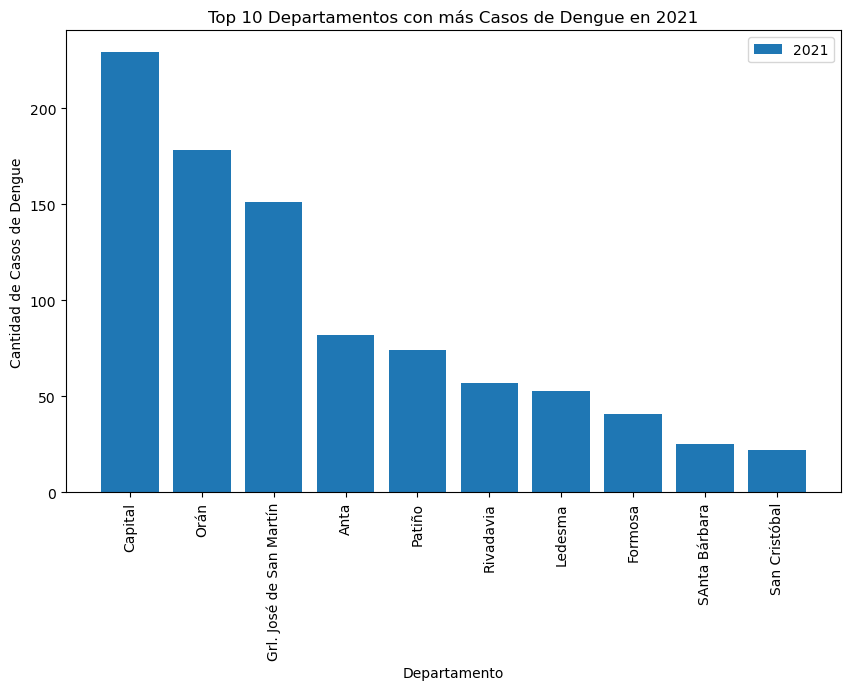

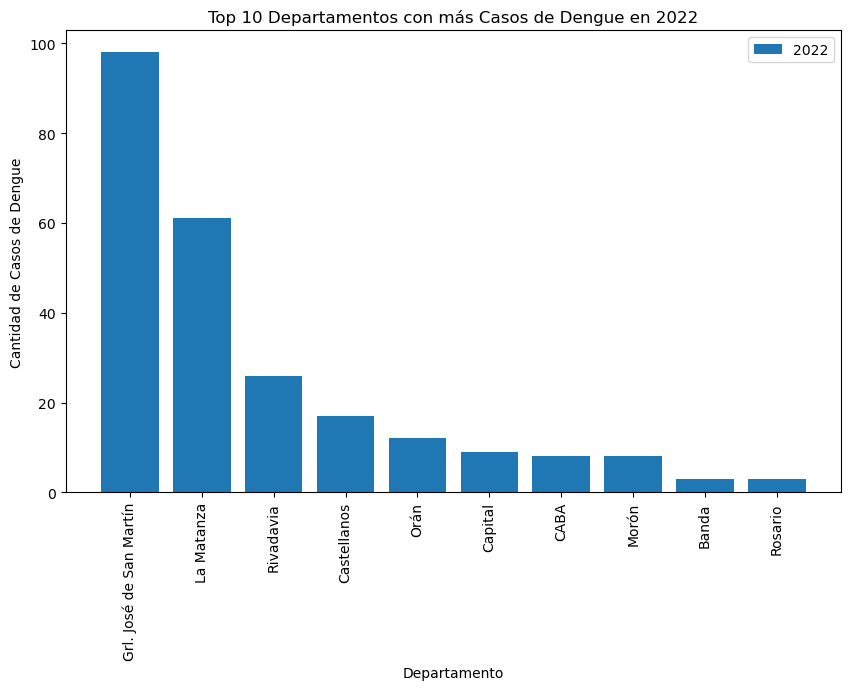

In [23]:
import pandas as pd
import matplotlib.pyplot as plt



# Obtener el recuento de casos de dengue por departamento y año
departamento_casos_por_año = df.groupby(['departamento_nombre', 'año']).size().unstack(fill_value=0)

# Obtener los 10 departamentos con más casos en cada año
top_10_departamentos_2021 = departamento_casos_por_año[2021].nlargest(10)
top_10_departamentos_2022 = departamento_casos_por_año[2022].nlargest(10)

# Graficar el histograma para el año 2021
plt.figure(figsize=(10, 6))
plt.bar(top_10_departamentos_2021.index, top_10_departamentos_2021.values, label='2021')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Casos de Dengue')
plt.title('Top 10 Departamentos con más Casos de Dengue en 2021')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Graficar el histograma para el año 2022
plt.figure(figsize=(10, 6))
plt.bar(top_10_departamentos_2022.index, top_10_departamentos_2022.values, label='2022')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Casos de Dengue')
plt.title('Top 10 Departamentos con más Casos de Dengue en 2022')
plt.xticks(rotation=90)
plt.legend()
plt.show()


# Análisis comparativo por año. 

<Figure size 1200x600 with 0 Axes>

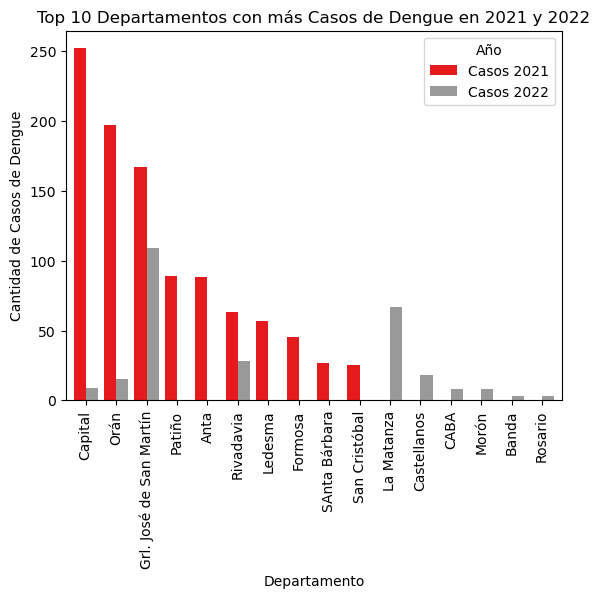

In [17]:


# Obtener el recuento de casos de dengue por departamento y año
departamento_casos_por_año = df.groupby(['departamento_nombre', 'año']).size().unstack(fill_value=0)

# Obtener los 10 departamentos con más casos en cada año
top_10_departamentos_2021 = departamento_casos_por_año[2021].nlargest(10)
top_10_departamentos_2022 = departamento_casos_por_año[2022].nlargest(10)

# Unir los datos de ambos años en un solo DataFrame
data = pd.concat([top_10_departamentos_2021, top_10_departamentos_2022], axis=1)
data.columns = ['Casos 2021', 'Casos 2022']

# Graficar el histograma de barras agrupadas
plt.figure(figsize=(12, 6))
data.plot(kind='bar', width=0.8, colormap='Set1')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Casos de Dengue')
plt.title('Top 10 Departamentos con más Casos de Dengue en 2021 y 2022')
plt.xticks(rotation=90)
plt.legend(title='Año')
plt.show()


## Distinción de contagios por edades: 

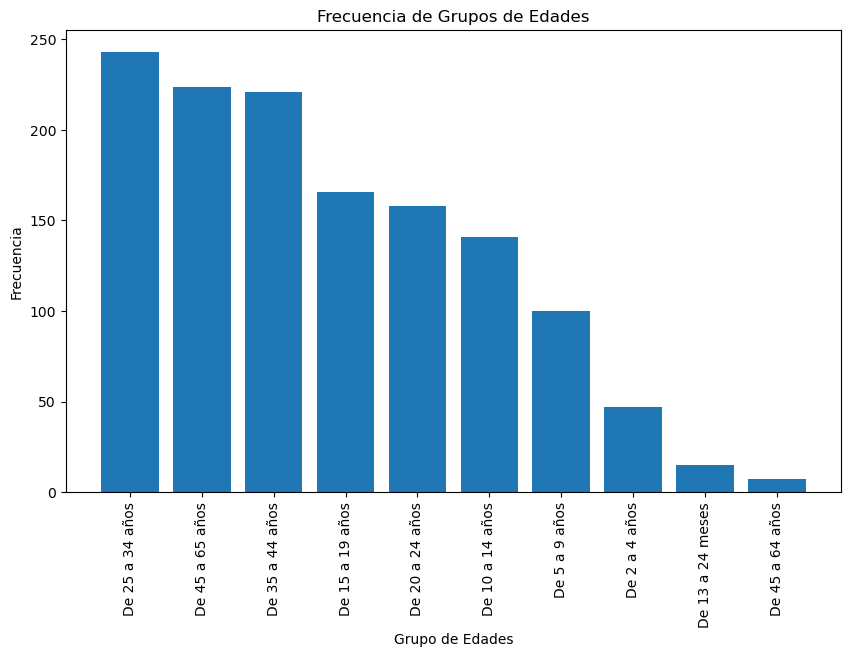

El grupo de edades más frecuente es 'De 25 a 34 años' con 243 casos.


In [22]:


# Función para extraer el rango de edad numérico desde el texto
def extract_age_range(age_string):
    age_range = age_string.split(" ")[1:]  # Eliminar la palabra "De"
    try:
        age_start, age_end = int(age_range[0]), int(age_range[-2])  # Tomar el primer y último elemento del rango
        return pd.Series([age_start, age_end])
    except ValueError:
        return pd.Series([float('nan'), float('nan')])  # Si no podemos extraer los valores, asignar NaN

# Aplicar la función para obtener el rango de edad numérico en dos columnas nuevas
df[['edad_inicio', 'edad_fin']] = df['grupo_edad_desc'].apply(extract_age_range)

# Eliminar registros con rangos de edad no válidos (NaN)
df = df.dropna(subset=['edad_inicio', 'edad_fin'])

# Calcular la frecuencia de cada rango de edad
edad_frecuencia = df['grupo_edad_desc'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
plt.bar(edad_frecuencia.index, edad_frecuencia.values)
plt.xlabel('Grupo de Edades')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Grupos de Edades')
plt.xticks(rotation=90)
plt.show()

# Obtener el grupo de edades más frecuente
grupo_edades_mas_frecuente = edad_frecuencia.idxmax()
cantidad_mas_frecuente = edad_frecuencia.max()

print(f"El grupo de edades más frecuente es '{grupo_edades_mas_frecuente}' con {cantidad_mas_frecuente} casos.")
